# iris データ

## データの概観

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
data = load_iris()
print(data)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [2]:
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']
labels = target_names[target]

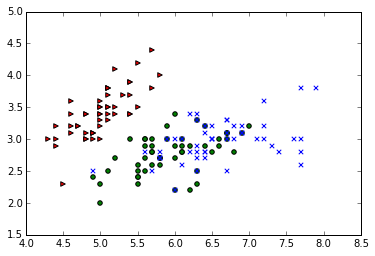

In [3]:
for t, marker, c in zip(range(3), '>ox', 'rgb'):
    plt.scatter(features[target == t, 0],
                features[target == t, 1],
                marker=marker,
                c=c)

参考までに seaborn を使った可視化

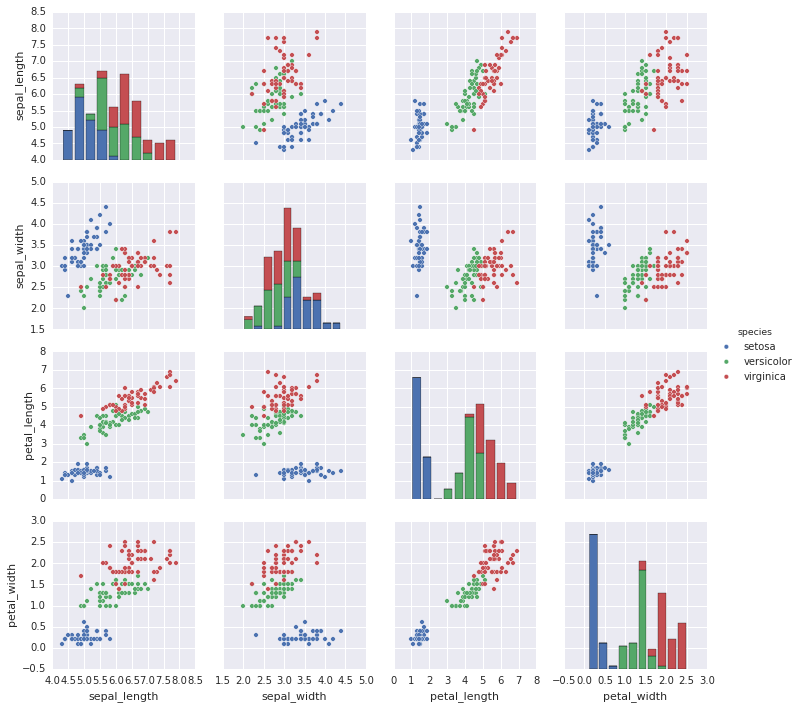

In [4]:
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

## Setosa の分類

In [6]:
print(features[labels == 'setosa', 2].max())
print(features[labels == 'setosa', 2].min())

1.9
1.0


DataFrame を使った sentosa petal_length の最大値、最小値の出し方。

In [7]:
print(max(df[df.species=="setosa"]['petal_length']))
print(min(df[df.species=="setosa"]['petal_length']))
print(min(df[df.species!="setosa"]['petal_length']))

1.9
1.0
3.0


setosa の petal_length の最大値は他の種類の petal_length の最小値よりも小さいので、setosa は petal_length に着目するだけで分類できる。ということで、この時点のモデルは下記のように表される。

In [8]:
def apply_model(example):
    if example[2] < 2: return 'setosa'
    else: return 'virginica or versicolor'

## virginica と versicolor の分類

ここでは、問題から sentosa を外す。

In [9]:
is_setosa = (labels == 'setosa')
labels = labels[~is_setosa]
features = features[~is_setosa]

In [10]:
def fit_model(features, labels):
    best_acc = -1
    best_fi = None
    best_t = None
    for fi in range(features.shape[1]):
        thres = list(set(features[:, fi]))
        thres.sort()
        for t in thres:
            pred = (features[:, fi] > t)
            acc = (pred == labels).mean()
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
    return (best_t, best_fi)

In [11]:
def predict(model, features, labels):
    t, fi = model
    pred = (features[:, fi] > t)
    return pred == labels

leave-out-one 法による評価

In [12]:
is_virginica = (labels == 'virginica')
result = []
for ei in range(len(features)):
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    result += list(predict(model, features[testing], is_virginica[testing]))
np.mean(result)

0.87

## scikit learn による K-fold cross validation

train_test_split() の場合

In [13]:
# 
:!w
    :
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    features, is_virginica, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60, 4) (60,)
(40, 4) (40,)


KFold() の場合

In [14]:
kf = cross_validation.KFold(len(features), n_folds=5, shuffle=True)
for train_index, test_index in kf:
    model = fit_model(features[train_index], is_virginica[train_index])
    print((predict(model, features[test_index], is_virginica[test_index])).mean())

0.9
0.85
0.95
0.9
0.85
